In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [118]:
df = pd.read_csv('BIKE DETAILS.csv')
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [119]:
"""
Q1) What is the range of selling prices in the dataset?
Answer-
"""

#range = max_value - min_value

range = df['selling_price'].max() - df['selling_price'].min()
print(range)


755000


In [120]:
"""
Q2) What is the median selling price for bikes in the dataset?
Answer-
"""
df['selling_price'].median()

np.float64(45000.0)

In [121]:
"""
Q3) What is the most common seller type?
Answer-
"""
df.seller_type.mode()

0    Individual
Name: seller_type, dtype: object

In [122]:
"""
Q4) How many bikes have driven more than 50,000 kilometers?
Answer-
"""

df['km_driven'][df['km_driven'] > 50000].count()

np.int64(170)

In [123]:
#alternative way

(df['km_driven'] > 50000).sum()

np.int64(170)

In [124]:
#alternative way
df.loc[df['km_driven'] > 50000, 'km_driven'].count()

np.int64(170)

In [125]:
"""
Q5) What is the average km_driven value for each ownership type?
Answer-
"""
df.groupby('owner')['km_driven'].mean()

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

In [126]:
"""
Q6) What proportion of bikes are from the year 2015 or older?
Answer-
"""
proportion = (df['year'][df['year'] <= 2015].count() / df['year'].count()) * 100
proportion

np.float64(56.64467483506126)

In [127]:
#alternative way

proportion = (df['year'] <= 2015).sum() / df['year'].count() * 100
proportion

np.float64(56.64467483506126)

In [128]:
#alternative way

proportion = (df['year'] <= 2015).mean() * 100
proportion


np.float64(56.64467483506126)

In [129]:
"""
Q7)  What is the trend of missing values across the dataset?
Answer-
"""
df.isnull().sum()

#insight - ex_showroom_price column contains 435 null values

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

<Axes: title={'center': 'Missing Values Trend'}>

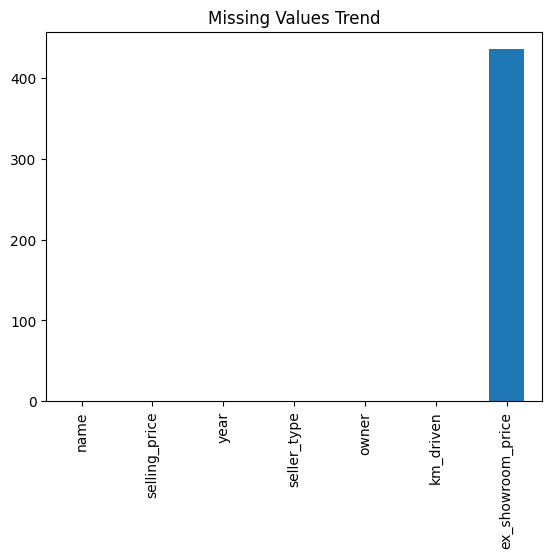

In [130]:
#visualization of missing values

df.isnull().sum().plot(kind= 'bar', title= 'Missing Values Trend')

In [131]:
"""
Q8)  What is the highest ex_showroom_price recorded, and for which bike?
Answer-
"""
#checking whether the datatype is numerical
df['ex_showroom_price'].dtypes

dtype('float64')

In [132]:
#checking for null values
df['ex_showroom_price'].isnull().sum()

np.int64(435)

In [133]:
#replacing null values with 0
df['ex_showroom_price'].fillna(0, inplace= True)

In [134]:
df['ex_showroom_price'].isnull().sum()

np.int64(0)

In [135]:
#assigning the max value in ex_showroom_price column to a variable
max_price = df['ex_showroom_price'].max()


In [136]:
#Accessing the row of max value in ex_showroom_price column
df[df['ex_showroom_price'] == max_price]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


In [137]:
#Extracting the Bike Name
df[df['ex_showroom_price'] == max_price]['name']

134    Harley-Davidson Street Bob
Name: name, dtype: object

In [138]:
"""
Q9) What is the total number of bikes listed by each seller type?
Answer-
"""
df.seller_type.value_counts()

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64

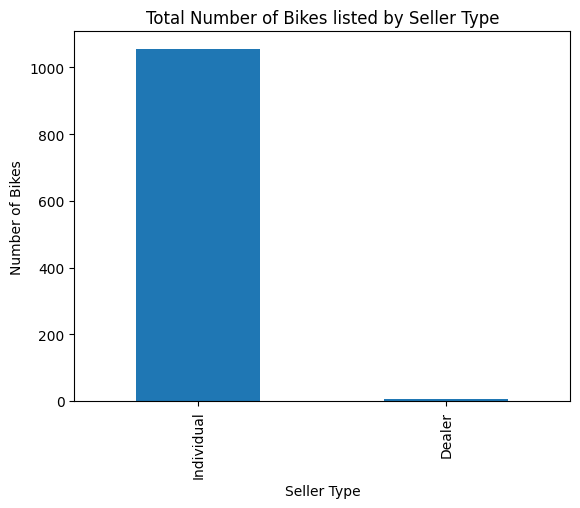

In [139]:
ax = (df.seller_type.value_counts()).plot.bar()
ax.set_title('Total Number of Bikes listed by Seller Type')
ax.set_xlabel('Seller Type')
ax.set_ylabel('Number of Bikes')
plt.show()

In [140]:
"""
Q10) What is the relationship between selling_price and km_driven for first-owner bikes?
Answer-
"""
df.owner.dtype

dtype('O')

In [141]:
df.owner.unique()

array(['1st owner', '2nd owner', '3rd owner', '4th owner'], dtype=object)

In [142]:
df.owner.replace({'1st owner': 1, '2nd owner': 2, '3rd owner': 3, '4th owner': 4}, inplace= True)

In [143]:
df.owner.unique()

array([1, 2, 3, 4])

In [144]:
df.owner.dtype

dtype('int64')

In [145]:
first_owner = df[df['owner'] == 1]

In [146]:
#correlation between selling price and km driven
first_owner[['selling_price', 'km_driven']].corr()

,selling_price,km_driven
selling_price,1.000000,-0.243482
km_driven,-0.243482,1.000000


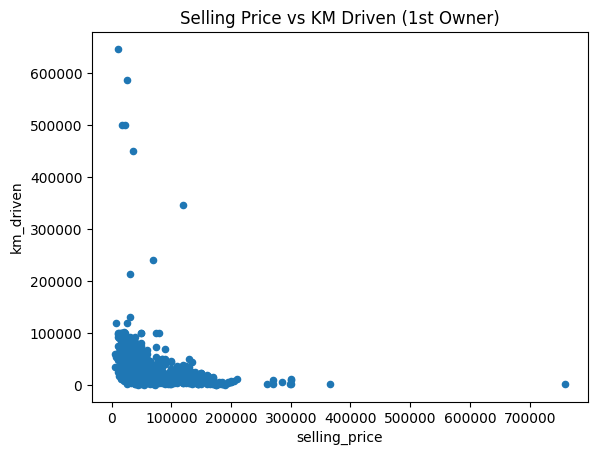

In [147]:
#scatter plot representing relationship between selling price and km driven
first_owner.plot.scatter(x='selling_price', y='km_driven', title = 'Selling Price vs KM Driven (1st Owner)')
plt.show()

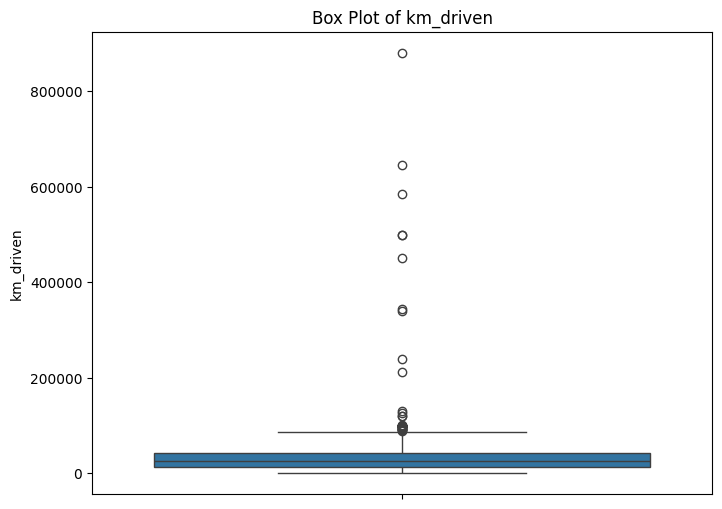

In [148]:
"""
Q11) Identify and remove outliers in the km_driven column using the IQR method?
Answer-
"""
plt.figure(figsize= (8,6))
sns.boxplot(df['km_driven'])
plt.title('Box Plot of km_driven')
plt.show()

In [149]:
df['km_driven'].quantile([0.25, 0.5, 0.75, 1])

0.25     13500.0
0.50     25000.0
0.75     43000.0
1.00    880000.0
Name: km_driven, dtype: float64

In [150]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

IQR = Q3 - Q1

In [151]:
IQR

np.float64(29500.0)

In [152]:
lower_outlier = Q1 - 1.5 * IQR
lower_outlier

np.float64(-30750.0)

In [153]:
higher_outlier = Q3 + 1.5 * IQR
higher_outlier

np.float64(87250.0)

In [154]:
df[df['km_driven'] > higher_outlier].shape

(39, 7)

In [155]:
df[df['km_driven'] < lower_outlier].shape

(0, 7)

In [156]:
#data withing IQR range(data without outliers)

km_without_outliers = df[(df['km_driven'] < higher_outlier) & (df['km_driven'] > lower_outlier)].reset_index(drop=True)
km_without_outliers

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1,350,0.0
1,Honda Dio,45000,2017,Individual,1,5650,0.0
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2,21000,0.0
...,...,...,...,...,...,...,...
1017,Hero CBZ Xtreme,20000,2010,Individual,1,50000,78700.0
1018,Bajaj ct 100,18000,2017,Individual,1,35000,32000.0
1019,Honda CB twister,16000,2012,Individual,1,33000,51000.0
1020,Bajaj Discover 125,15000,2013,Individual,2,35000,57000.0


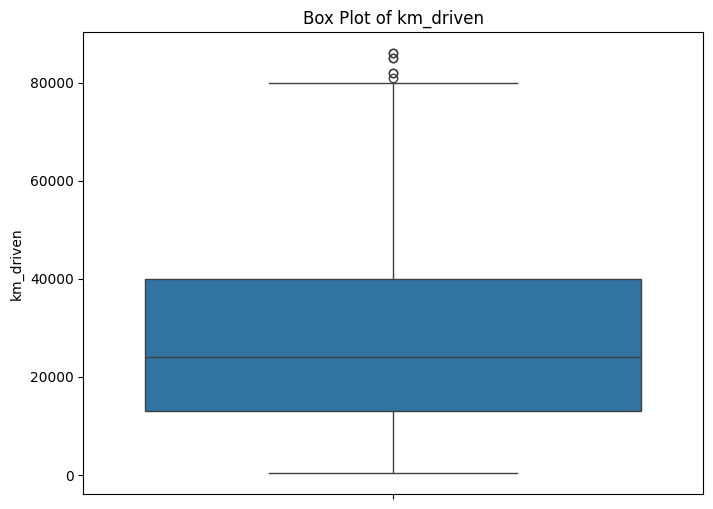

In [157]:
#Box plot after treating outliers

plt.figure(figsize= (8,6))
sns.boxplot(km_without_outliers['km_driven'])
plt.title('Box Plot of km_driven')
plt.show()

In [158]:
"""
Q12)  Perform a bivariate analysis to visualize the relationship between year and selling_price?
Answer-
"""
df[['year','selling_price']]

,year,selling_price
0,2019,175000
1,2017,45000
2,2018,150000
3,2015,65000
4,2011,20000
...,...,...
1056,2010,17000
1057,2012,16000
1058,2013,15000
1059,2009,12000


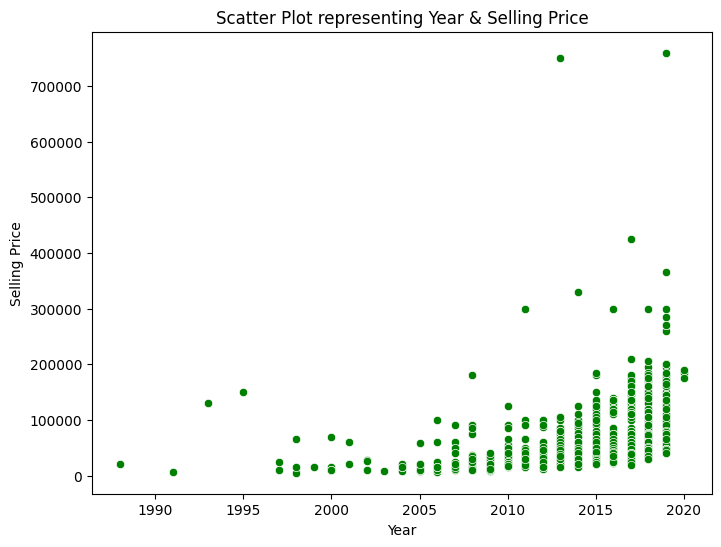

In [159]:

plt.figure(figsize= (8,6))
sns.scatterplot(x= 'year', y='selling_price', data=df, color = 'green')
plt.title('Scatter Plot representing Year & Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

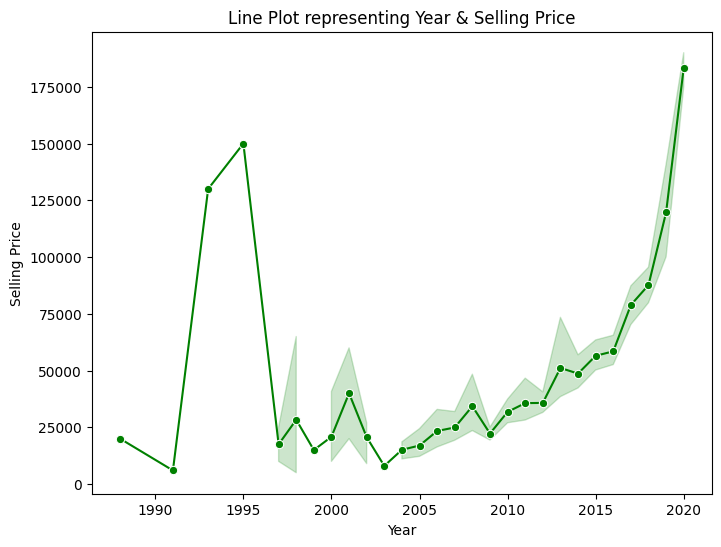

In [160]:

plt.figure(figsize= (8,6))
sns.lineplot(x= 'year', y='selling_price', data=df, color = 'green', marker= 'o')
plt.title('Line Plot representing Year & Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [175]:
"""
Q13) What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)
Answer-
"""
filtered_df = df[(df['selling_price'] > 0)  & (df['ex_showroom_price'] > 0)]
filtered_df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0
5,Honda CB Twister,18000,2010,Individual,1,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1,17000,87719.0
9,Bajaj Discover 125,50000,2016,Individual,1,42000,60122.0
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1,53000,58000.0


In [176]:
filtered_df['bike age'] = (2024) - filtered_df['year']
filtered_df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike age
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0,6
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0,9
5,Honda CB Twister,18000,2010,Individual,1,60000,53857.0,14
6,Honda CB Hornet 160R,78500,2018,Individual,1,17000,87719.0,6
9,Bajaj Discover 125,50000,2016,Individual,1,42000,60122.0,8
...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1,500000,52000.0,14
1057,Honda CB twister,16000,2012,Individual,1,33000,51000.0,12
1058,Bajaj Discover 125,15000,2013,Individual,2,35000,57000.0,11
1059,Honda CB Shine,12000,2009,Individual,1,53000,58000.0,15


In [177]:
filtered_df['depriciation'] = filtered_df['ex_showroom_price'] - filtered_df['selling_price']
filtered_df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike age,depriciation
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0,6,-1886.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0,9,24643.0
5,Honda CB Twister,18000,2010,Individual,1,60000,53857.0,14,35857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1,17000,87719.0,6,9219.0
9,Bajaj Discover 125,50000,2016,Individual,1,42000,60122.0,8,10122.0
...,...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1,500000,52000.0,14,35000.0
1057,Honda CB twister,16000,2012,Individual,1,33000,51000.0,12,35000.0
1058,Bajaj Discover 125,15000,2013,Individual,2,35000,57000.0,11,42000.0
1059,Honda CB Shine,12000,2009,Individual,1,53000,58000.0,15,46000.0


In [178]:
filtered_df['depriciation_per_year'] = filtered_df['depriciation'] / filtered_df['bike age']
filtered_df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike age,depriciation,depriciation_per_year
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0,6,-1886.0,-314.333333
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0,9,24643.0,2738.111111
5,Honda CB Twister,18000,2010,Individual,1,60000,53857.0,14,35857.0,2561.214286
6,Honda CB Hornet 160R,78500,2018,Individual,1,17000,87719.0,6,9219.0,1536.500000
9,Bajaj Discover 125,50000,2016,Individual,1,42000,60122.0,8,10122.0,1265.250000
...,...,...,...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1,500000,52000.0,14,35000.0,2500.000000
1057,Honda CB twister,16000,2012,Individual,1,33000,51000.0,12,35000.0,2916.666667
1058,Bajaj Discover 125,15000,2013,Individual,2,35000,57000.0,11,42000.0,3818.181818
1059,Honda CB Shine,12000,2009,Individual,1,53000,58000.0,15,46000.0,3066.666667


In [179]:
avg_depreciation = filtered_df['depriciation_per_year'].mean()

In [180]:
print(f"The average depreciation in selling price based on the bike's age is {avg_depreciation}")

The average depreciation in selling price based on the bike's age is 2962.700568795575


In [181]:
"""
Q14) Which bike names are priced significantly above the average price for their manufacturing year?
Answer-
"""
avg_price_by_year = filtered_df.groupby('year')['selling_price'].mean()
avg_price_by_year

year
2001     20000.000000
2004     18000.000000
2005     10000.000000
2006     11500.000000
2007     24983.333333
2008     19871.428571
2009     22642.857143
2010     32057.142857
2011     36787.878788
2012     32810.486486
2013     52349.056604
2014     49453.030303
2015     54550.000000
2016     53597.440476
2017     70529.411765
2018     87837.662338
2019    111125.000000
2020    190000.000000
Name: selling_price, dtype: float64

In [ ]:
filtered_df = filtered_df.merge(avg_price_by_year, on='year', suffixes=('', '_avg'))

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,bike age,depriciation,depriciation_per_year,selling_price_avg
0,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1,12000,148114.0,6,-1886.0,-314.333333,87837.662338
1,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1,23000,89643.0,9,24643.0,2738.111111,54550.000000
2,Honda CB Twister,18000,2010,Individual,1,60000,53857.0,14,35857.0,2561.214286,32057.142857
3,Honda CB Hornet 160R,78500,2018,Individual,1,17000,87719.0,6,9219.0,1536.500000,87837.662338
4,Bajaj Discover 125,50000,2016,Individual,1,42000,60122.0,8,10122.0,1265.250000,53597.440476
...,...,...,...,...,...,...,...,...,...,...,...
621,Activa 3g,17000,2010,Individual,1,500000,52000.0,14,35000.0,2500.000000,32057.142857
622,Honda CB twister,16000,2012,Individual,1,33000,51000.0,12,35000.0,2916.666667,32810.486486
623,Bajaj Discover 125,15000,2013,Individual,2,35000,57000.0,11,42000.0,3818.181818,52349.056604
624,Honda CB Shine,12000,2009,Individual,1,53000,58000.0,15,46000.0,3066.666667,22642.857143


In [187]:
high_priced_bikes = filtered_df[filtered_df['selling_price'] > 1.5 * filtered_df['selling_price_avg']]
high_priced_bikes[['name', 'year', 'selling_price']] 


,name,year,selling_price
0,Royal Enfield Classic Gunmetal Grey,2018,150000
8,Yamaha YZF R3,2019,365000
11,Royal Enfield Classic Gunmetal Grey,2018,150000
24,Honda CBR-250R,2016,120000
45,Mahindra Mojo XT300,2017,165000
...,...,...,...
546,Royal Enfield Thunder 350,2013,105000
548,Royal Enfield Classic 350,2015,100000
549,Royal Enfield Classic 500,2014,95000
550,Royal Enfield Classic 500,2011,90000


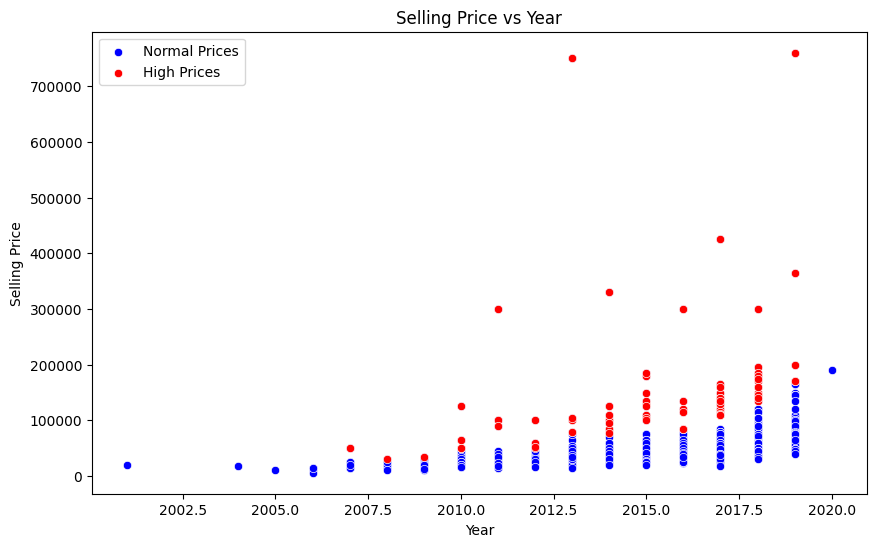

In [ ]:
#Scatter plot representing Selling Price vs Year

plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_df, x='year', y='selling_price', color='blue', label='Normal Prices')
sns.scatterplot(data=high_priced_bikes, x='year', y='selling_price', color='red', label='High Prices')
plt.title('Selling Price vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.legend()
plt.show()


In [191]:
"""
Q15) Develop a correlation matrix for numeric columns and visualize it using a heatmap.
Answer-
"""
correlation_matrix = filtered_df.corr(numeric_only=True)
correlation_matrix

,selling_price,year,owner,km_driven,ex_showroom_price,bike age,depriciation,depriciation_per_year,selling_price_avg
selling_price,1.000000,0.350654,0.078933,-0.194093,0.918583,-0.350654,0.345663,0.383770,0.393883
year,0.350654,1.000000,-0.132047,-0.329823,0.126378,-1.000000,-0.343490,-0.127804,0.890248
owner,0.078933,-0.132047,1.000000,-0.027684,0.164873,0.132047,0.246583,0.224569,-0.165087
km_driven,-0.194093,-0.329823,-0.027684,1.000000,-0.122011,0.329823,0.066531,0.006747,-0.330522
ex_showroom_price,0.918583,0.126378,0.164873,-0.122011,1.000000,-0.126378,0.688385,0.693692,0.151464
bike age,-0.350654,-1.000000,0.132047,0.329823,-0.126378,1.000000,0.343490,0.127804,-0.890248
depriciation,0.345663,-0.343490,0.246583,0.066531,0.688385,0.343490,1.000000,0.942663,-0.363269
depriciation_per_year,0.383770,-0.127804,0.224569,0.006747,0.693692,0.127804,0.942663,1.000000,-0.214727
selling_price_avg,0.393883,0.890248,-0.165087,-0.330522,0.151464,-0.890248,-0.363269,-0.214727,1.000000


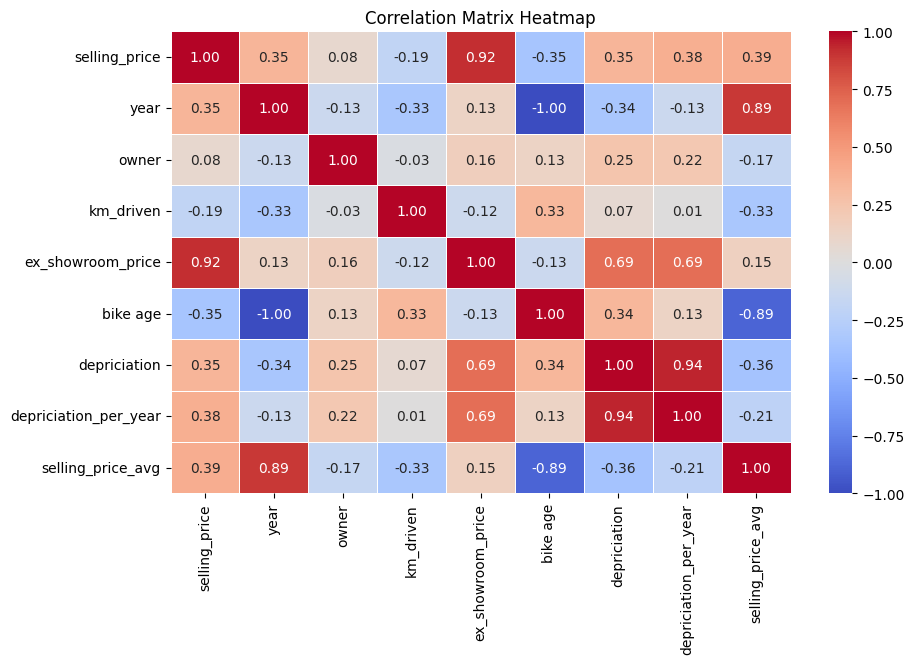

In [197]:
plt.figure(figsize= (10,6))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt =".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()